                                    EDA

 Title: Bike Details Datase

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"E:\DATA ANALYTICS 2025\DATASETS\BIKE DETAILS.csv")



In [5]:
# 1. What is the range of selling prices in the dataset?
print(df.head())
# Find the minimum selling price
min_price = df['selling_price'].min()

# Find the maximum selling price
max_price = df['selling_price'].max()

# Combine them into a tuple as the price range
price_range = (min_price, max_price)

print("Selling Price Range:", price_range)


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
Selling Price Range: (np.int64(5000), np.int64(760000))


In [5]:
# 2.  What is the median selling price for bikes in the dataset?

# Calculate the median of the 'selling_price' column
median_price = df['selling_price'].median()

# Print the result
print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


In [5]:
# 3. What is the most common seller type?
# Find the most frequent seller type
most_common_seller = df['seller_type'].mode()[0]

# Print the result
print("Most Common Seller Type:", most_common_seller)

Most Common Seller Type: Individual


In [4]:
# 4.  How many bikes have driven more than 50,000 kilometers?
# Filter rows where 'km_driven' is greater than 50,000
bikes_above_50k = df[df['km_driven'] > 50000]

# Count how many such bikes exist
count = len(bikes_above_50k)

# Print the result
print("Number of bikes driven more than 50,000 km:", count)

Number of bikes driven more than 50,000 km: 170


In [ ]:
#. 5 What is the average km_driven value for each ownership type
df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [5]:
# 5.What proportion of bikes are from the year 2015 or older
proportion_2015_or_older = (df['year'] <= 2015).sum() / len(df)
print("Proportion of bikes from 2015 or older:", proportion_2015_or_older)

Proportion of bikes from 2015 or older: 0.5664467483506126


In [9]:
# 7.What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
missing_values


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [10]:
# 8.  What is the highest ex_showroom_price recorded, and for which bike
max_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_price][['name', 'ex_showroom_price']]
print(bike_with_max_price)

                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [ ]:
# 9. What is the total number of bikes listed by each seller type
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

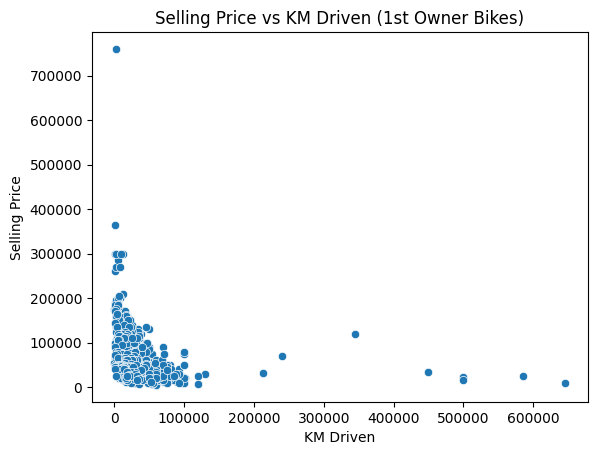

In [13]:
# 10.  What is the relationship between selling_price and km_driven for first-owner bikes
first_owner = df[df['owner'] == '1st owner']
sns.scatterplot(data=first_owner, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (1st Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

In [6]:
# 11.  Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

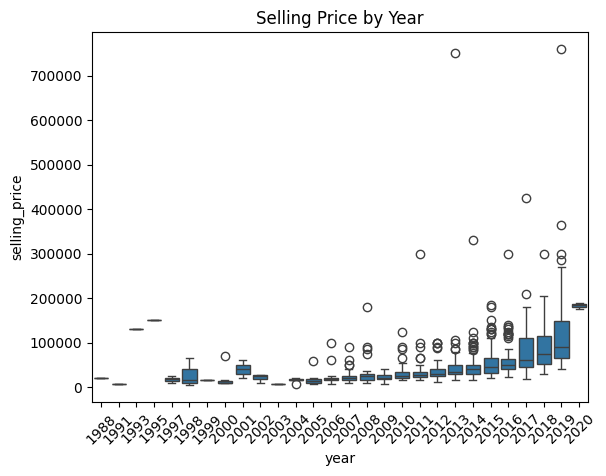

In [17]:
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Selling Price by Year')
plt.show()

In [16]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_priceimport datetime
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print(avg_depreciation)

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [17]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year
year_avg = df.groupby('year')['selling_price'].mean().reset_index()
merged = df.merge(year_avg, on='year', suffixes=('', '_year_avg'))
outliers = merged[merged['selling_price'] > 1.5 * merged['selling_price_year_avg']]
print(outliers[['name', 'year', 'selling_price']])

                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


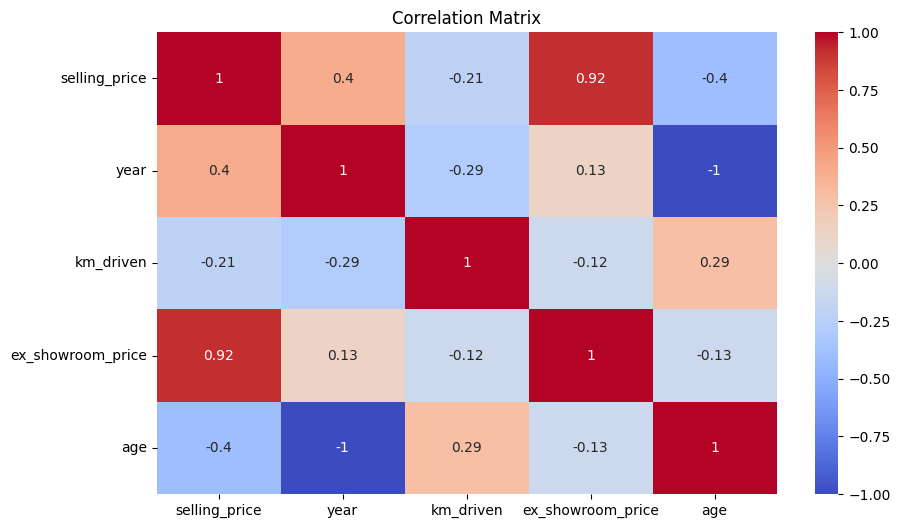

In [19]:
# 14.  Which bike names are priced significantly above the average price for their manufacturing year
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

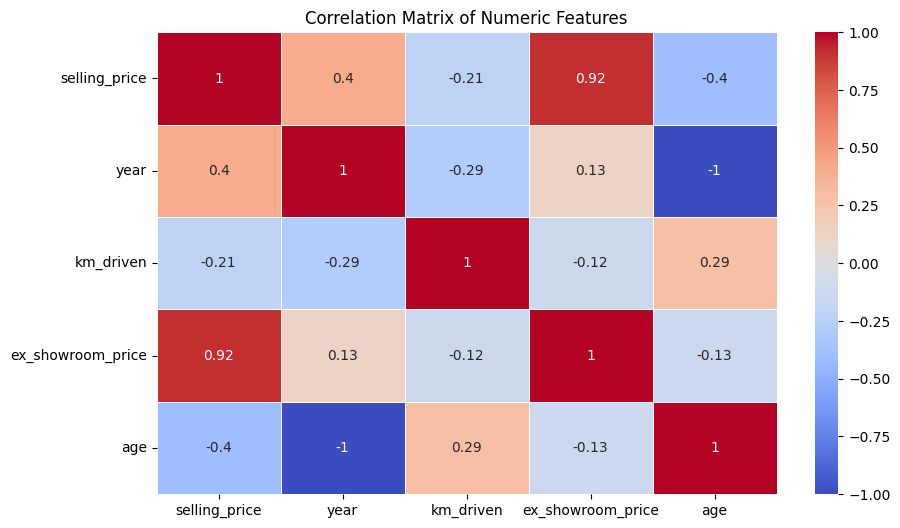

In [20]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

 Title: Car Sale Dataset

In [35]:
df_car = pd.read_csv("E:\DATA ANALYTICS 2025\DATASETS\Car Sale.csv")


In [36]:
# 1.What is the average selling price of cars for each dealer, and how does it compare across different dealer
dealer_avg_price = df_car.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print(dealer_avg_price.head(10))

Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Saab-Belle Dodge                     28190.139888
Capitol KIA                          28189.703822
Race Car Help                        28163.372706
Name: Price ($), dtype: float64


In [37]:
# 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
brand_price_std = df_car.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print("Highest price variation:\n", brand_price_std.head(5))

Highest price variation:
 Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


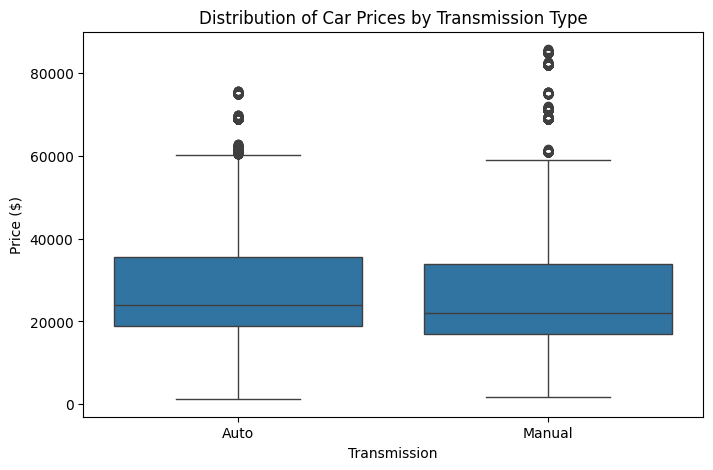

In [38]:
# 3   What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_car, x="Transmission", y="Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

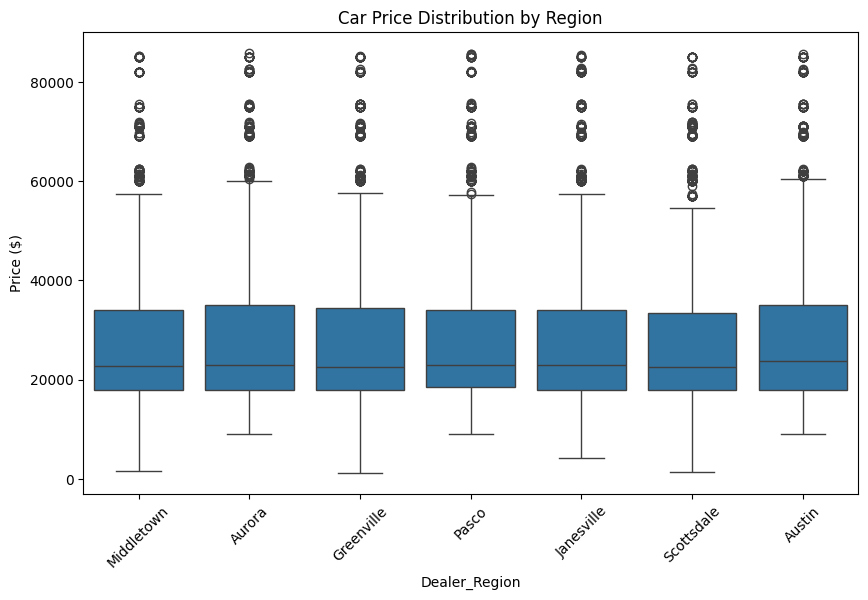

In [39]:
# 4 What is the distribution of car prices across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car, x="Dealer_Region", y="Price ($)")
plt.title("Car Price Distribution by Region")
plt.xticks(rotation=45)
plt.show()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


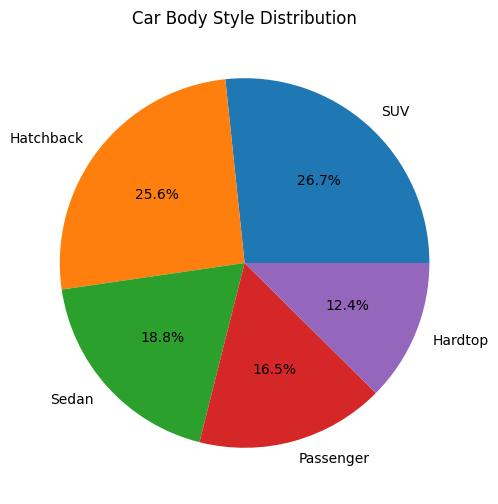

In [40]:
# 5 What is the distribution of cars based on body styles
body_style_counts = df_car["Body Style"].value_counts()
print(body_style_counts)

# Optional: pie chart
body_style_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Car Body Style Distribution')
plt.ylabel("")
plt.show()

In [41]:
# 6 How does the average selling price of cars vary by customer gender and annual income
gender_income_price = df_car.groupby("Gender")[["Annual Income", "Price ($)"]].mean()
print(gender_income_price)


        Annual Income     Price ($)
Gender                             
Female  755973.021339  28277.265270
Male    851184.044207  28039.429407


In [42]:
# 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region
region_price_stats = df_car.groupby("Dealer_Region")["Price ($)"].describe()
print(region_price_stats[["count", "mean", "50%", "std"]])

                count          mean      50%           std
Dealer_Region                                             
Aurora         3130.0  28334.626837  23000.0  15026.207252
Austin         4135.0  28341.603628  23801.0  14903.884549
Greenville     3128.0  28180.819054  22500.0  15101.538328
Janesville     3821.0  27833.350955  23000.0  14344.995638
Middletown     3128.0  27856.338875  22750.0  14619.842395
Pasco          3131.0  28119.039923  23000.0  14659.315941
Scottsdale     3433.0  27954.958928  22600.0  14902.916820


In [43]:
# 8  How does the average car price differ between cars with different engine sizes
engine_price_avg = df_car.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)
print(engine_price_avg.head())


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [44]:
# 9  How do car prices vary based on the customer’s annual income bracket
# Create income brackets
df_car["Income_Bracket"] = pd.cut(df_car["Annual Income"], bins=[0, 50000, 100000, 500000, 1000000, 2000000],
                                   labels=["<50K", "50K-100K", "100K-500K", "500K-1M", "1M-2M"])

income_price = df_car.groupby("Income_Bracket")["Price ($)"].mean()
print(income_price)

Income_Bracket
<50K         27884.297820
50K-100K     43000.000000
100K-500K    28563.329860
500K-1M      28011.726423
1M-2M        28016.841147
Name: Price ($), dtype: float64


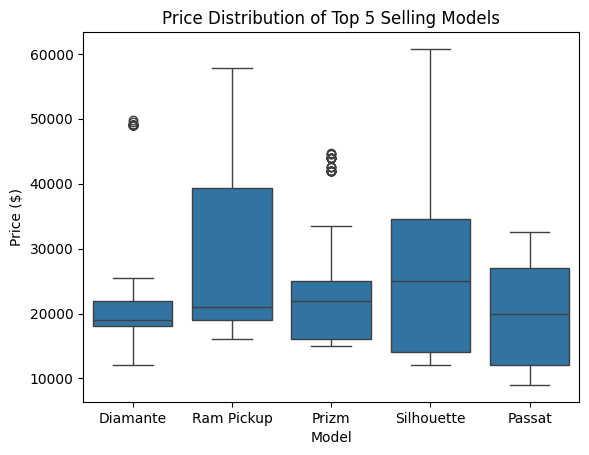

In [45]:
# 10 What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df_car["Model"].value_counts().head(5).index
sns.boxplot(data=df_car[df_car["Model"].isin(top_models)], x="Model", y="Price ($)")
plt.title("Price Distribution of Top 5 Selling Models")
plt.show()

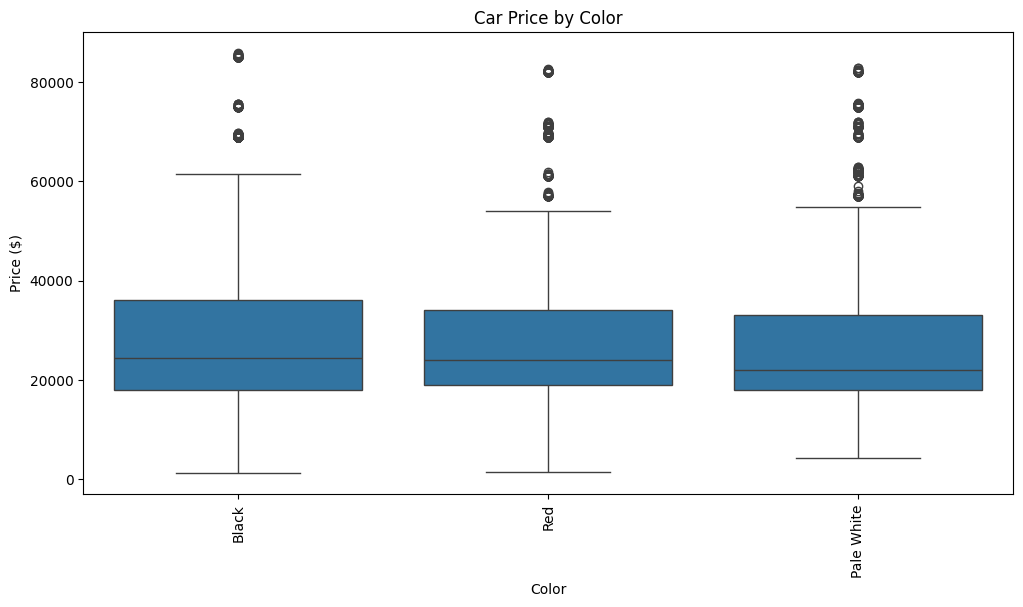

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [46]:
# 11 How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_car, x="Color", y="Price ($)")
plt.xticks(rotation=90)
plt.title("Car Price by Color")
plt.show()

# Variation in price by color
color_price_variation = df_car.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print(color_price_variation.head(5))

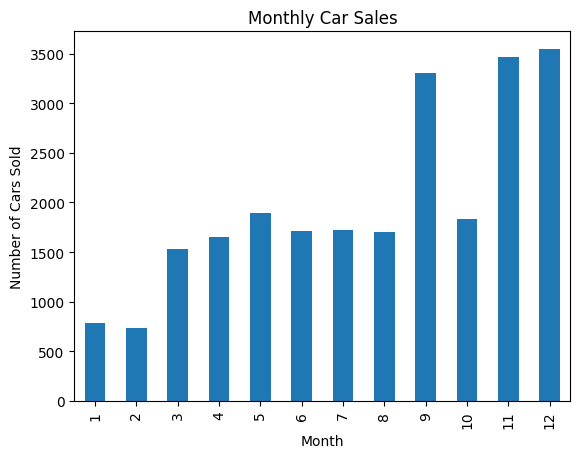

In [47]:
# 12  Is there any seasonal trend in car sales based on the date of sale
df_car["Date"] = pd.to_datetime(df_car["Date"])
df_car["Month"] = df_car["Date"].dt.month

sales_per_month = df_car.groupby("Month")["Price ($)"].count()
sales_per_month.plot(kind='bar', title="Monthly Car Sales")
plt.ylabel("Number of Cars Sold")
plt.show()

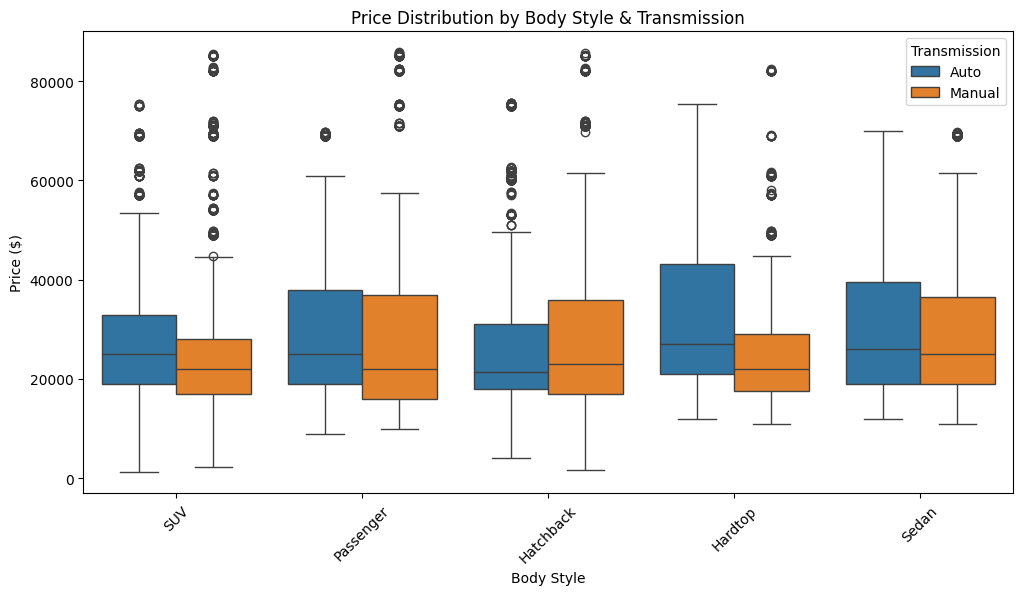

In [48]:
# 13 How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_car, x="Body Style", y="Price ($)", hue="Transmission")
plt.title("Price Distribution by Body Style & Transmission")
plt.xticks(rotation=45)
plt.show()

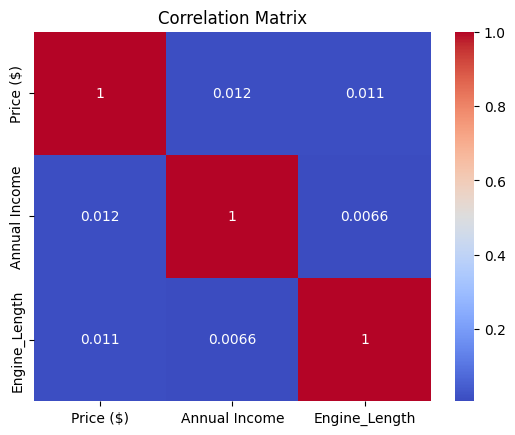

In [49]:
# 14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
df_car["Engine_Length"] = df_car["Engine"].astype(str).str.len()  # rough proxy

correlation_df = df_car[["Price ($)", "Annual Income", "Engine_Length"]]
correlation_matrix = correlation_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [50]:
# 15 How does the average car price vary across different car models and engine types?
avg_price_model_engine = df_car.groupby(["Model", "Engine"])["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_model_engine.head(10))

Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


Title: Amazon Sales Data

In [43]:
df = pd.read_csv(r'E:\DATA ANALYTICS 2025\DATASETS\amazon.csv')

In [23]:
# 1. What is the average rating for each product category?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where category or rating is missing
df = df.dropna(subset=['category', 'rating'])
avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Optional: sort by highest rating
avg_rating = avg_rating.sort_values(by='rating', ascending=False)

print(avg_rating)


                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [48]:
# 2. What are the top rating_count products by category
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop rows with missing category, product name, or rating count
df = df.dropna(subset=['category', 'product_name', 'rating_count'])

# Sort by category and then rating count (descending)
df_sorted = df.sort_values(['category', 'rating_count'], ascending=[True, False])

# Get top product in each category
top_products = df_sorted.groupby('category').first().reset_index()

# Display result
print(top_products[['category', 'product_name', 'rating_count']])

                                             category  \
0   Computers&Accessories|Accessories&Peripherals|...   
1   Computers&Accessories|Accessories&Peripherals|...   
2   Computers&Accessories|Accessories&Peripherals|...   
3   Computers&Accessories|Accessories&Peripherals|...   
4   Computers&Accessories|Accessories&Peripherals|...   
..                                                ...   
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...   
82  OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                         product_name  rating_count  
0   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
1   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
2   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
3   STRIFF Mpad Mouse Mat 230X190X3

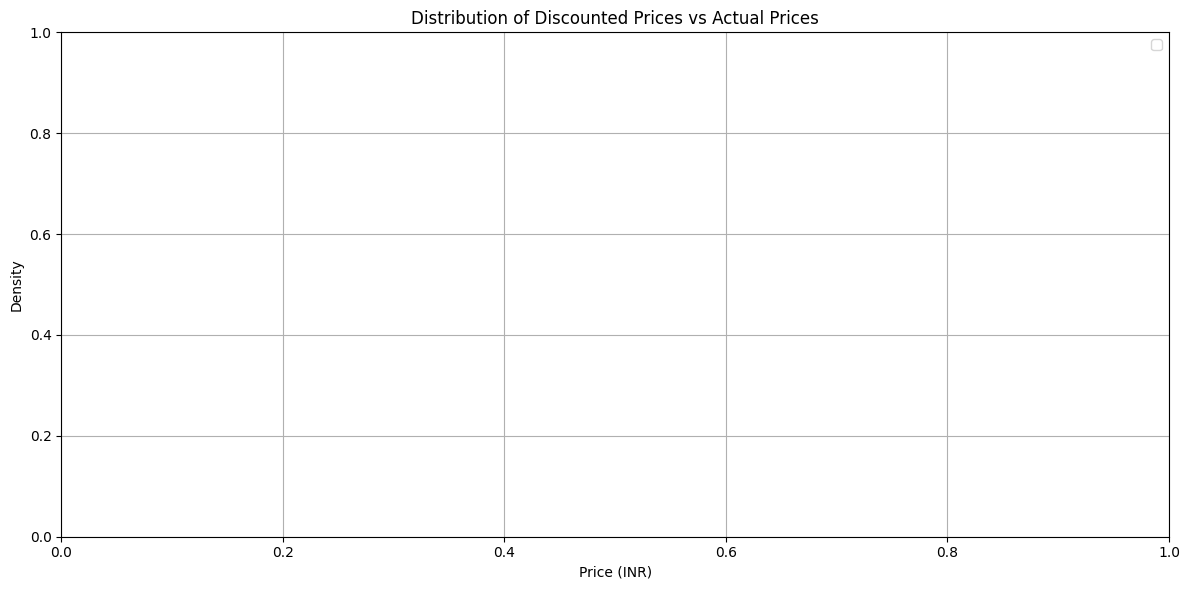

In [33]:
# 3  What is the distribution of discounted prices vs. actual prices?
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Step 2: Convert to numeric, coercing errors to NaN
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Step 3: Drop rows with missing prices
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Step 4: Plot the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True, color='blue')
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True, color='green')
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# 4. How does the average discount percentage vary across categories
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df = df.dropna(subset=['discount_percentage'])

# Step 2: Extract the main category (first part before '|')
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

# Step 3: Calculate the average discount percentage by main category
avg_discount_by_category = (
    df.groupby('main_category')['discount_percentage']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Step 4: Print the result in the desired format
print("Average Discount Percentage by Main Category:")
print(avg_discount_by_category)

Average Discount Percentage by Main Category:
           main_category  discount_percentage
0        HomeImprovement            57.500000
1  Computers&Accessories            54.024283
2    Health&PersonalCare            53.000000
3            Electronics            50.828897
4     MusicalInstruments            46.000000
5          Car&Motorbike            42.000000
6           Home&Kitchen            40.174497
7         OfficeProducts            12.354839
8             Toys&Games             0.000000


In [44]:
# 5.  What are the most popular product names
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['rating_count', 'product_name'])

# Sort by rating_count in descending order to get most reviewed products
popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False)

# Drop duplicates to show unique product names only
popular_products = popular_products.drop_duplicates(subset='product_name')

# Show top 10 most popular product names
print("Most Popular Product Names by Number of Reviews:")
print(popular_products.head(10))

Most Popular Product Names by Number of Reviews:
                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


In [45]:
# 6. What are the most popular product keywords
product_names = df['product_name'].dropna().str.lower()

# Extract keywords
all_keywords = []
for name in product_names:
    words = re.findall(r'\b[a-z]{3,}\b', name)  # extract words with 3+ letters
    all_keywords.extend(words)

# Count most common keywords
keyword_counts = Counter(all_keywords).most_common(20)

# Print top 20 keywords
for word, count in keyword_counts:
    print(f"{word}: {count}")

with: 751
for: 673
black: 529
usb: 416
cable: 412
and: 331
charging: 245
type: 241
fast: 210
smart: 175
white: 169
compatible: 145
data: 135
led: 129
pro: 124
wireless: 119
water: 114
remote: 109
heater: 108
bluetooth: 107


In [46]:
# 7. What are the most popular product reviews
popular_reviews = df['review_content'].dropna().value_counts().head(10)

# Display the top 10 most common reviews
print("Top 10 Most Common Product Reviews:")
print(popular_reviews)



Top 10 Most Common Product Reviews:
review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. Th

In [47]:
# 8 What is the correlation between discounted_price and rating
df['discounted_price'] = df['discounted_price'].astype(str).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Convert 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['discounted_price', 'rating'])

# Calculate the correlation
correlation = df_clean['discounted_price'].corr(df_clean['rating'])

# Display the result
print("Correlation between discounted_price and rating:", correlation)

Correlation between discounted_price and rating: nan


In [49]:
# 9. What are the Top 5 categories based on the highest ratings
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

# Display the result
print("Top 5 Categories by Average Rating:")
print(top_categories)

Top 5 Categories by Average Rating:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


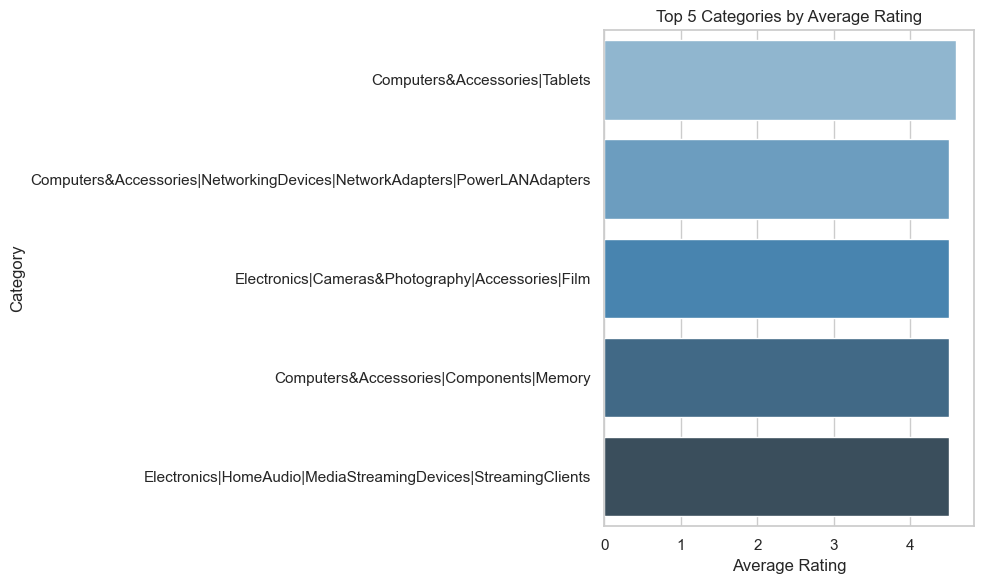

In [50]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis
sns.set(style="whitegrid")

# Group by category and compute average rating
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_d")
plt.title("Top 5 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# 10 ow Rating Products in High-Rated Categories
Observation: Some products may underperform in otherwise highly-rated categories.

Action: Flag these products for review. Investigate common complaints in review_content and take corrective action (e.g., improve quality, revise descriptions).

📉 Low Performing Categories
Observation: Categories with low average ratings may indicate issues in that product segment.

Action: Perform sentiment analysis on reviews in those categories to find root causes (e.g., poor durability, misleading ads, etc.).

🤑 High Discounts with Low Conversions or Ratings
Observation: Products with deep discounts but low ratings or reviews might suggest:

The product is low quality

Fake or inflated pricing strategies

Action: Optimize pricing and ensure discount strategies align with real value.

🗣️ Review Content Patterns
Observation: Repeated phrases like "broke in a week", "not as described", "great value" etc. can signal quality issues or unique strengths.

Action: Use keyword analysis or sentiment scoring to:

Improve product descriptions

Highlight top features in marketing

Address negative patterns directly

🚚 Product Categories with High Ratings but Low Review Count
Observation: Products that are well-rated but don’t get many reviews may need visibility.

Action:

Promote via ads or recommendations

Ask verified buyers for reviews post-purchase

📦 Image & Content Optimization
Observation: Products with good ratings but low conversions may suffer from weak visuals or vague descriptions.

Action: Enhance img_link, product copy, and bullet points in about_product.

📊 User Behavior Insights
Segment users by user_id and analyze:

Are top reviewers rating honestly?

Do certain users leave consistently low reviews?

Are loyal customers returning to specific categories?

🔁 Repetitive or Spam Reviews
If review_content shows many repeated reviews:

Filter spam or fake reviews

Introduce better moderation and validation

"Spotify Data: Popular Hip-hop Artists and Tracks" 

In [52]:
df = pd.read_csv('E:\DATA ANALYTICS 2025\DATASETS\spotify.csv')

In [53]:
# 1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print("🔍 Null values in each column:")
print(df.isnull().sum())

# Optional: Drop rows with too many missing values or fill missing values if needed
# Example: Drop rows with any null values
df_cleaned = df.dropna()

# Step 3: Check for duplicate rows
duplicate_count = df_cleaned.duplicated().sum()
print(f"\n🔁 Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Final check
print(f"\n✅ Final data shape: {df_cleaned.shape}")

🔍 Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

🔁 Number of duplicate rows: 27

✅ Final data shape: (413, 5)


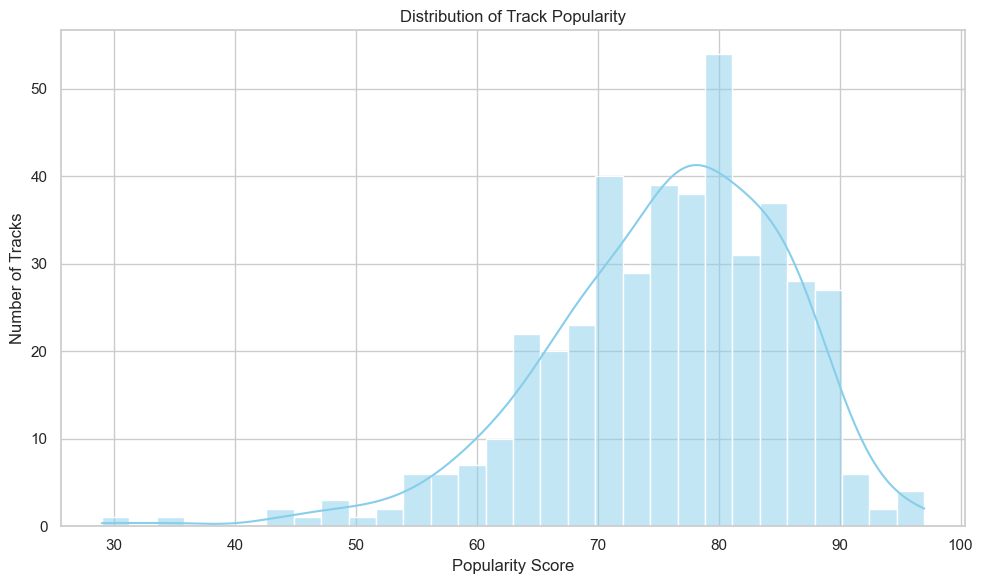

In [59]:
# 2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
    # Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()


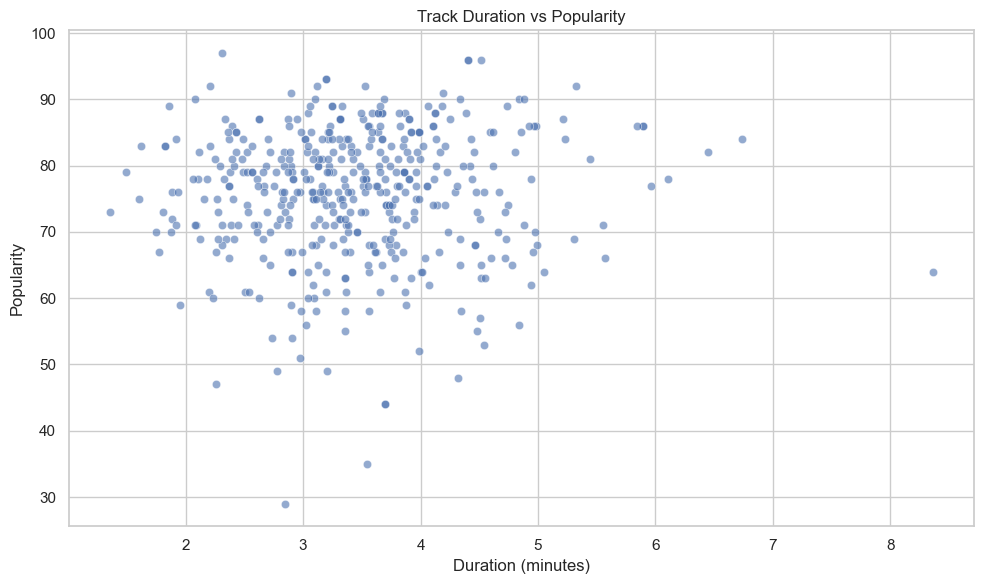

In [69]:
# 3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
# Convert duration to minutes if it's in milliseconds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='Popularity', data=df, alpha=0.6)

plt.title("Track Duration vs Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'duration_min'],
      dtype='object')

The artist with the highest number of tracks is: Drake (20 tracks)


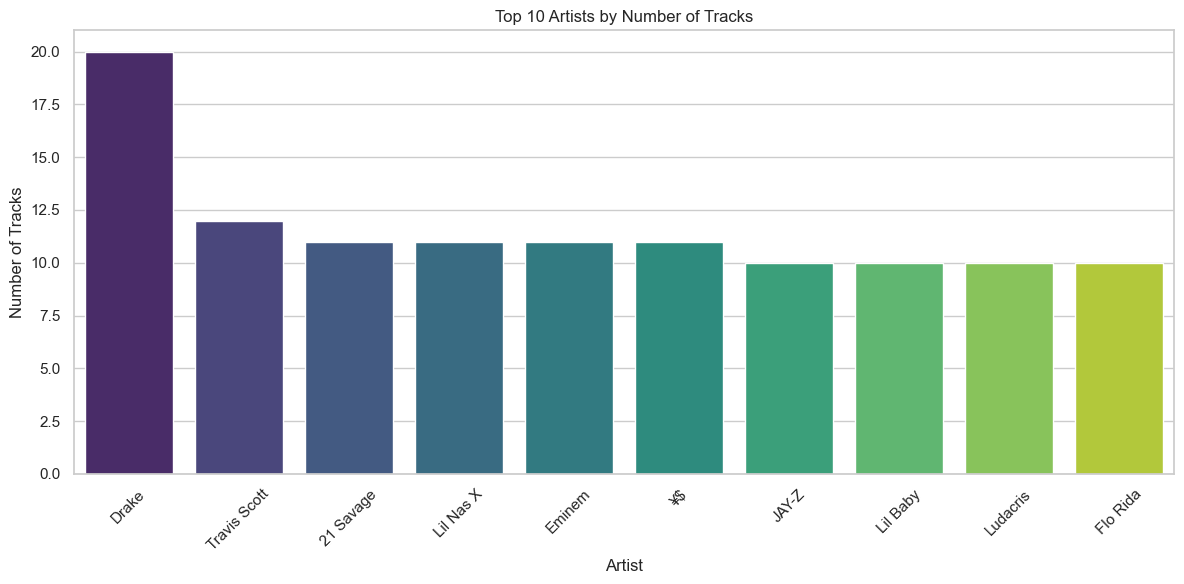

In [70]:
# 4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
artist_track_counts = df['Artist'].value_counts()

# Display the artist with the highest number of tracks
top_artist = artist_track_counts.idxmax()
top_count = artist_track_counts.max()
print(f"The artist with the highest number of tracks is: {top_artist} ({top_count} tracks)")

# Optional: Limit to top 10 artists for better visualization
top_artists = artist_track_counts.head(10)

# Plot using countplot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# 5  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

# Display artist and track name
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [72]:
# 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
# Step 1: Calculate average popularity per artist
avg_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()

# Step 2: Count number of tracks per artist
track_counts = df['Artist'].value_counts()

# Step 3: Get top 5 artists by number of tracks
top_5_artists = track_counts.head(5).index

# Step 4: Filter average popularity for only these top 5 artists
top_5_avg_popularity = avg_popularity_per_artist[top_5_artists].sort_values(ascending=False)

# Step 5: Display result
print("Average Popularity for Top 5 Artists by Track Count:")
print(top_5_avg_popularity)

# Highlight the top among them
most_popular_artist = top_5_avg_popularity.idxmax()
highest_avg_popularity = top_5_avg_popularity.max()
print(f"\n🎤 The artist with the highest average popularity is **{most_popular_artist}** with a score of {highest_avg_popularity:.2f}")


Average Popularity for Top 5 Artists by Track Count:
Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64

🎤 The artist with the highest average popularity is **Travis Scott** with a score of 87.00


In [73]:
# 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
avg_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()

# Step 2: Get top 5 most popular artists by average popularity
top_5_artists_by_avg_popularity = avg_popularity_per_artist.sort_values(ascending=False).head(5).index

# Step 3: For each artist, get the most popular track
print("Most Popular Track for Top 5 Artists:\n")

for artist in top_5_artists_by_avg_popularity:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    
    print(f"🎤 Artist: {artist}")
    print(f"🎵 Most Popular Track: {most_popular_track['Track Name']} (Popularity: {most_popular_track['Popularity']})\n")

Most Popular Track for Top 5 Artists:

🎤 Artist: cassö
🎵 Most Popular Track: Prada (Popularity: 92)

🎤 Artist: Trueno
🎵 Most Popular Track: Mamichula - con Nicki Nicole (Popularity: 89)

🎤 Artist: David Guetta
🎵 Most Popular Track: Baby Don't Hurt Me (Popularity: 87)

🎤 Artist: Travis Scott
🎵 Most Popular Track: FE!N (feat. Playboi Carti) (Popularity: 93)

🎤 Artist: ¥$
🎵 Most Popular Track: CARNIVAL (Popularity: 96)



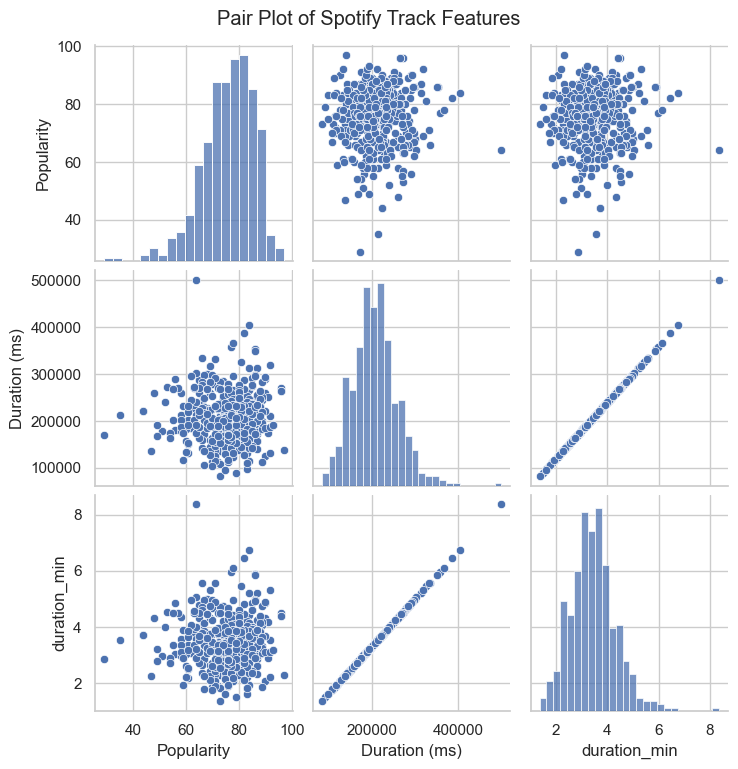

In [74]:
# 8  Visualize relationships between multiple numerical variables simultaneously using a pair plot
numeric_cols = ['Popularity', 'Duration (ms)', 'duration_min']

# Create pair plot
sns.pairplot(df[numeric_cols])

# Show the plot
plt.suptitle("Pair Plot of Spotify Track Features", y=1.02)
plt.show()

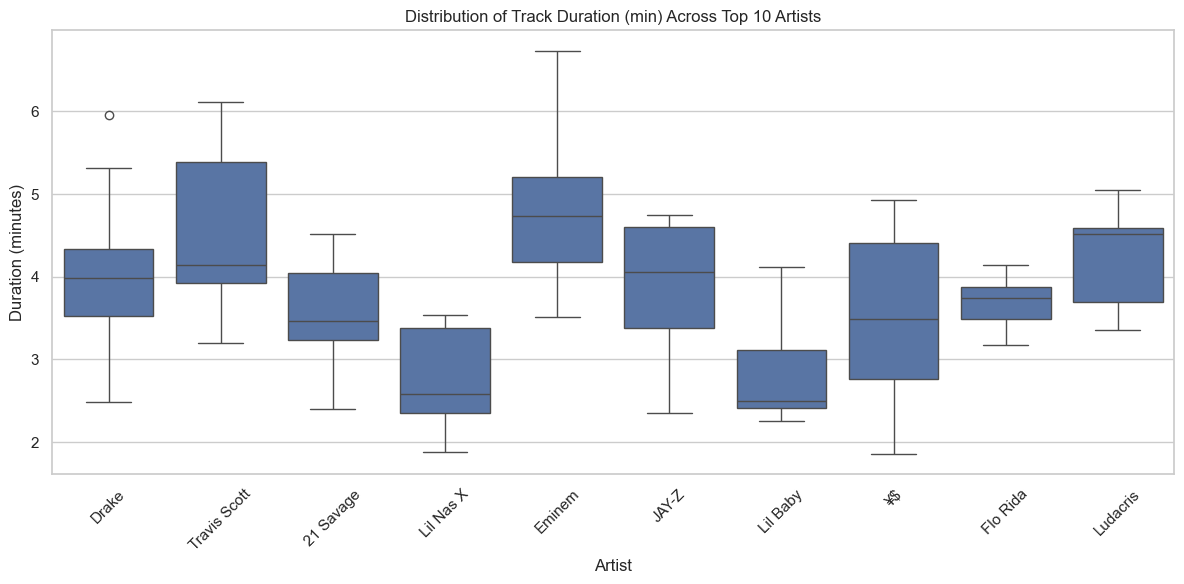

In [76]:
# 9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
top_artists = df['Artist'].value_counts().head(10).index

# Filter dataset
filtered_df = df[df['Artist'].isin(top_artists)]

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Artist', y='duration_min')
plt.xticks(rotation=45)
plt.title('Distribution of Track Duration (min) Across Top 10 Artists')
plt.ylabel('Duration (minutes)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()

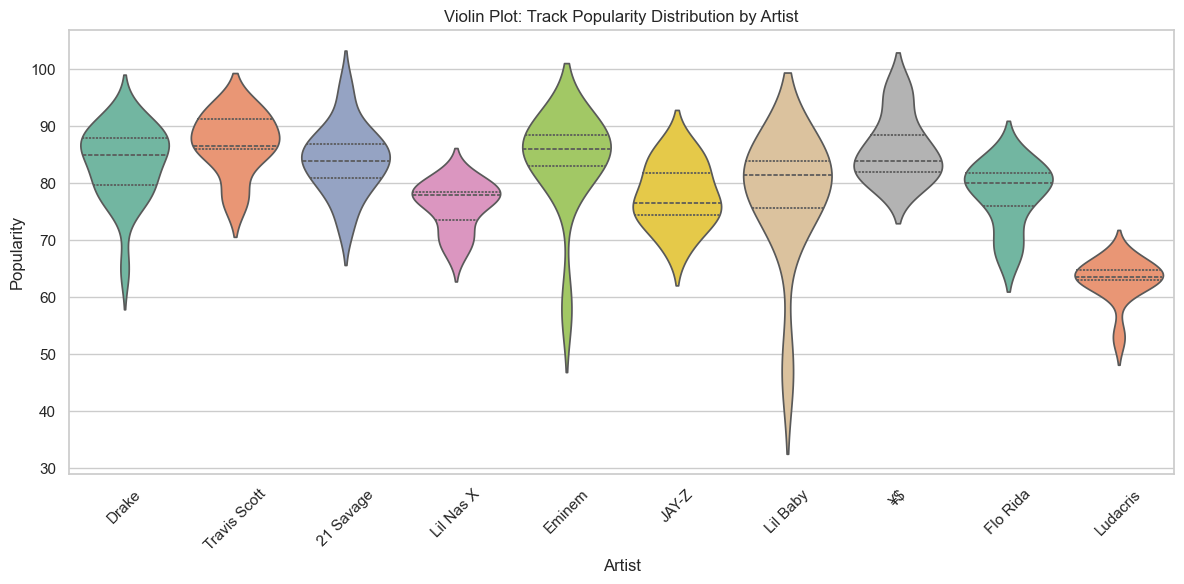

In [78]:
# 10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

# Plot: Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', inner='quartile', palette='Set2')
plt.title('Violin Plot: Track Popularity Distribution by Artist')
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()